In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
sns.set(style='darkgrid')

# Цель

Необходимо рассчитать зависимость начальной водонасыщенности от высоты над зеркалом свободной воды (ЗСВ) для 3-х вариантов условий.

# Условие 1.
- Неснижаемая водонасыщенность $S_{wo} = 0.421$. 
- Плотность нефти - $0.75 : \text{г/см}^3$, воды - $1.05 : \text{г/см}^3$. 
- Капиллярное давление задано функцией от водонасыщенности:
$P_{cap} = 0.937 \cdot \left(e^{-25S_w} - e^{-25} \right) / \left(e^{-25S_{wo}} - e^{-25} \right) : \text{бар}$, где $1 : \text{бар} = 10^5 : \text{Па}$.

Требуется рассчитать зависимость начальной водонасыщенности от высоты над зеркалом свободной воды и определить, на какой высоте $H$ будет достигнуто значение $S_w = 0.421$.

In [3]:
# Условие 1
S_wo = 0.421
S_w_req = 0.421
do = 750
dw = 1050
g = 9.81
# P_kap = 0.937 * (math.exp(-25 * S_v) - math.exp(-25)) / (math.exp(-25 * S_vo) - math.exp(-25))

# Решение 1. 

Капиллярно-гравитационное равновесие характеризуется 
отсутствием потоков жидкости и равенством гравитационных сил, 
приводящих к разделению воды и нефти, с одной стороны, и капиллярных 
сил, подтягивающих смачивающую жидкость к кровле пласта. 

Расписываем капиллярное давление через плотности фаз:

$P_{cap} = \int_0^h (\rho_w - \rho_o) g dh = (\rho_w - \rho_o)gh$,

$ h $ - высота над ЗСВ

Полученное выражение подставляем в зависимость: $P_{cap} = 0.937 \cdot \frac{\left(e^{-25S_w} - e^{-25} \right)}{\left(e^{-25S_{wo}} - e^{-25} \right)}$.

и выражаем $h$. Чтобы перевести бары в паскали домножить на $10^{5}$:

$h(\rho_w - \rho_o)g = {0.937} \cdot \frac{e^{-25S_w} - e^{-25}}{e^{-25S_{wo}} - e^{-25}} \cdot 10^5$

$h = \frac{0.937}{(\rho_w - \rho_o)g} \cdot \frac{e^{-25S_w} - e^{-25}}{e^{-25S_{wo}} - e^{-25}} \cdot 10^5$

Для того, чтобы определить на какой высоте $H$ будет достигнуто значение $S_{w} = 0.421$, подставляем данное значение $S_{w}$ в полученную формулу для $h$. Получаем:

In [4]:
H = 0.937 / ((dw-do)*g) * (math.exp(-25 * S_w_req) - math.exp(-25)) / (math.exp(-25 * S_wo) - math.exp(-25)) * 10**5
H

31.838260278627253

H = 31.8383

Далее, чтобы получить зависимость $S_w$ от высоты, выразим $S_w$  из исходной зависимости с подставленным выражением для $P_{cap}$ :

\begin{equation}
S_w = -\frac{1}{25} \ln\left(e^{-25} + \frac{e^{-25 \cdot S_w} - e^{-25}}{0.937 \cdot 10^5}\cdot (\rho_w - \rho_o)gh\right)
\end{equation}


In [5]:
S_w = lambda h: -1/25 * math.log(math.exp(-25) + (math.exp(-25 * S_wo) - math.exp(-25))/0.937 * (dw - do) * g * h * 10**(-5))

In [6]:
h = np.linspace(0.00001, H, 1000)

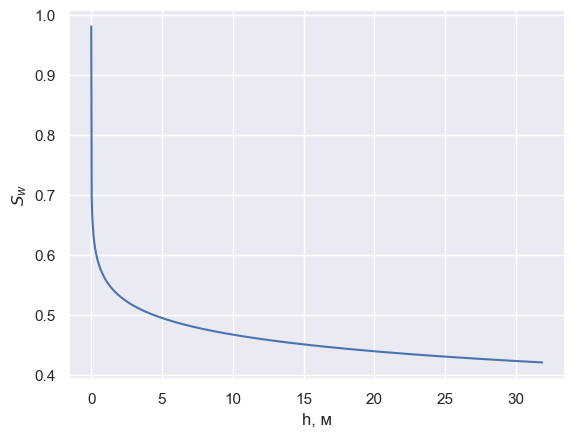

In [7]:
plt.plot(h, [S_w(i) for i in h])
# plt.plot([S_w(i) for i in h],h)

plt.xlabel('h, м')
plt.ylabel('$S_{w}$')
plt.show()

Зависимость начальной водонасыщенности от высоты над зеркалом 
свободной воды представлена на рисунке. На графике видно, что при 
увеличении высоты над ЗСВ водонасыщенность достигает неснижаемого 
значения $ S_{wo} = 0.421 $.

# Условие 2

Будем считать, что зависимость для капиллярного давления в п. 1 справедлива при краевом угле смачивания θ=0. 
Пусть далее θ линейно возрастает от 0 до 120 градусов (порода от чисто гидрофильной переходит в гидрофобную) на интервале высоты от 0 до H (из п. 1). 
При этом остальные параметры от высоты не меняются, а зависимость для капиллярного давления масштабируется в соответствии с правилом Леверетта.

Требуется рассчитать зависимость начальной водонасыщенности от высоты над зеркалом свободной воды.


# Решение 2.

Масштабирование зависимости для капиллярного давления в соответствии правилом Леверетта:
$P_{cap} = 0.937 \cdot \cos{\theta} \frac{\left(e^{-25S_w} - e^{-25} \right)}{\left(e^{-25S_{wo}} - e^{-25} \right)}$.

$ \theta=120\frac{h}{H},h∈[0,H]$

Так как капиллярно-гравитационное равновесие характеризуется 
отсутствием потоков жидкости и равенством гравитационных сил, 
приводящих к разделению воды и нефти, с одной стороны, и капиллярных 
сил, подтягивающих смачивающую жидкость к кровле пласта, то с
поправкой справедливо выражение из пункта 1:

Выразим $S_w$ и получим выражение

\begin{equation}
S_w = -\frac{1}{25} \ln\left(\exp(-25) + \frac{\exp(-25 \cdot S_w) - \exp(-25)}{0.937 \cdot \cos(120\frac{h}{H})}\cdot (\rho_w - \rho_o)gh\right)
\end{equation}

In [8]:
# поиск точки перехода 90 градусов
k = 0
for i in range(len(h)):
    if 120*h[i]/H > 90:
        k=i
        break
k

750

In [9]:
S_w2 = lambda h: -1/25 * math.log(math.exp(-25) + (math.exp(-25 * S_wo) - math.exp(-25))/0.937/np.cos(3.14/180*120*h/H)/10**5 * (dw - do) * g * h )

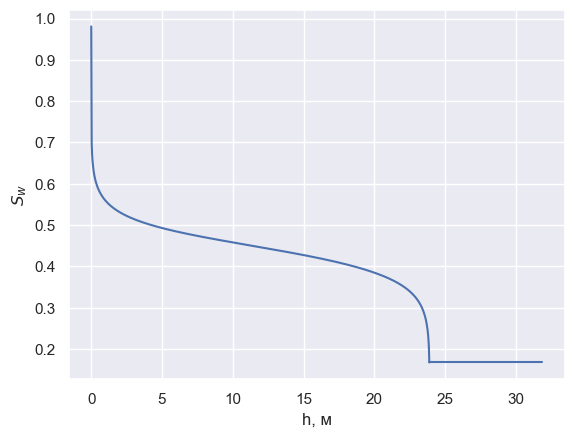

In [10]:
plt.plot(h[:k], [S_w2(i) for i in h[:k]], 'b')
plt.plot(h[k-1:], [S_w2(h[k-1]) for _ in h[k-1:]], 'b')


plt.xlabel('h, м')
plt.ylabel('$S_{w}$')
plt.show()

Зависимость начальной водонасыщенности от высоты над зеркалом 
свободной воды представлена на графике.
- Если cos(𝜃) > 0, то порода гидрофильна (капиллярные силы препятствуют опусканию более тяжелой воды вниз, удерживая воду в  порах). То есть достигается капиллярно-гравитационное равновесие.
- Если cos(𝜃) < 0, то порода гидрофобна (капиллярные силы не  препятствуют стеканию воды вниз, и в порах остается только неподвижная  (связанная) вода, на какой бы высоте от ЗСВ мы ни находились). Водонасыщенность равняется остаточной

# Условие 3.

Будем считать, что зависимость для капиллярного давления в п. 1 справедлива при проницаемости k=5 миллидарси.

Пусть далее k меняется по параболической зависимости, возрастая от 5 миллидарси на ЗСВ до 50 миллидарси на высоте H/2 , а затем снижаясь обратно до 5 миллидарси на высоте H (H из п.1). 

При этом остальные параметры от высоты не меняются, а зависимость для капиллярного давления масштабируется в соответствии с правилом Леверетта.

Рассчитать зависимость начальной водонасыщенности от высоты над зеркалом свободной воды.


# Решение 3.

Зависимость $P_{cap}$ масштабируется в соответствии с правилом 
Леверетта:

$$P_{cap} = \frac{\sigma \cos(\theta)}{\sqrt{\frac{k}{m}}} J(S_w)$$

$k_0 = 5 мД$


Масштабирование зависимости для капиллярного давления в соответствии правилом Леверетта с учётом того, что зависимость для капиллярного давления в п. 1 справедлива при проницаемости k=5 миллидарси
$$ P_{cap} = \frac{0.937\sqrt{5}}{\sqrt{k}} \cdot \frac{\left(e^{-25S_w} - e^{-25} \right)}{\left(e^{-25S_{wo}} - e^{-25} \right)}. $$

Пусть далее k меняется по параболической зависимости:
$ k = \alpha\cdot h^2 + \beta\cdot h + \gamma$

Найдём коэффициенты:

In [11]:
def find_quadratic_coefficients(x_points, y_points):
    X = np.array([[x**2, x, 1] for x in x_points])
    Y = np.array(y_points)
    coefficients = np.linalg.solve(X, Y)
    return coefficients

x_points = [0, H/2, H]
y_points = [5, 50, 5]
a, b, c = find_quadratic_coefficients(x_points, y_points)

print(f"Коэффициенты квадратичного полинома: a = {a}, b = {b}, c = {c}")

Коэффициенты квадратичного полинома: a = -0.17757173886549524, b = 5.653575240128068, c = 5.0


$$ k = -0.178 h^2 + 5.654 h + 5 $$

In [12]:
k = lambda h: a*h**2 + b*h + c

In [14]:
S_w3 = lambda h: -1/25 * math.log(math.exp(-25) + (math.exp(-25 * S_wo) - math.exp(-25))/0.937/10**5 * (dw - do) * g * h * (k(h)/5)**0.5 )  

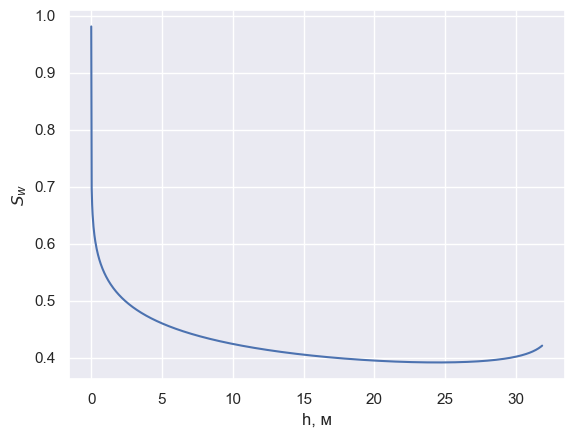

In [15]:
plt.plot(h, [S_w3(i) for i in h], 'b')
# plt.plot([S_w3(i) for i in h], h,'b')


plt.xlabel('h, м')
plt.ylabel('$S_{w}$')
plt.show()

Зависимость начальной водонасыщенности от высоты над зеркалом 
свободной воды представлена на графике. Водонасыщенность снижается
в том случае, когда увеличивается проницаемость, то есть порода 
пропускает больше флюида. Но при достижении проницаемости 5 мД
водонасыщенность будет равняться остаточной.